### Present State/UT Analytics-Delhi

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
from sklearn import preprocessing
import matplotlib.cm as cm

In [2]:
#importing the data
data1=pd.read_csv('Delhi data daily.csv')
data1

,Date,State/UT,Total_confirmed,Total_deaths,Total_cured,New_cases,New_deaths,New_cured
0,02-03-2020,Delhi,1,0,0,0,0,0
1,03-03-2020,Delhi,1,0,0,0,0,0
2,04-03-2020,Delhi,1,0,0,0,0,0
3,05-03-2020,Delhi,2,0,0,1,0,0
4,06-03-2020,Delhi,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...
138,23-07-2020,Delhi,126323,3719,107650,1227,29,1532
139,24-07-2020,Delhi,127364,3745,109065,1041,26,1415
140,25-07-2020,Delhi,128389,3777,110931,1025,32,1866
141,26-07-2020,Delhi,129531,3806,113068,1142,29,2137


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             143 non-null    object
 1   State/UT         143 non-null    object
 2   Total_confirmed  143 non-null    int64 
 3   Total_deaths     143 non-null    int64 
 4   Total_cured      143 non-null    int64 
 5   New_cases        143 non-null    int64 
 6   New_deaths       143 non-null    int64 
 7   New_cured        143 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 9.1+ KB


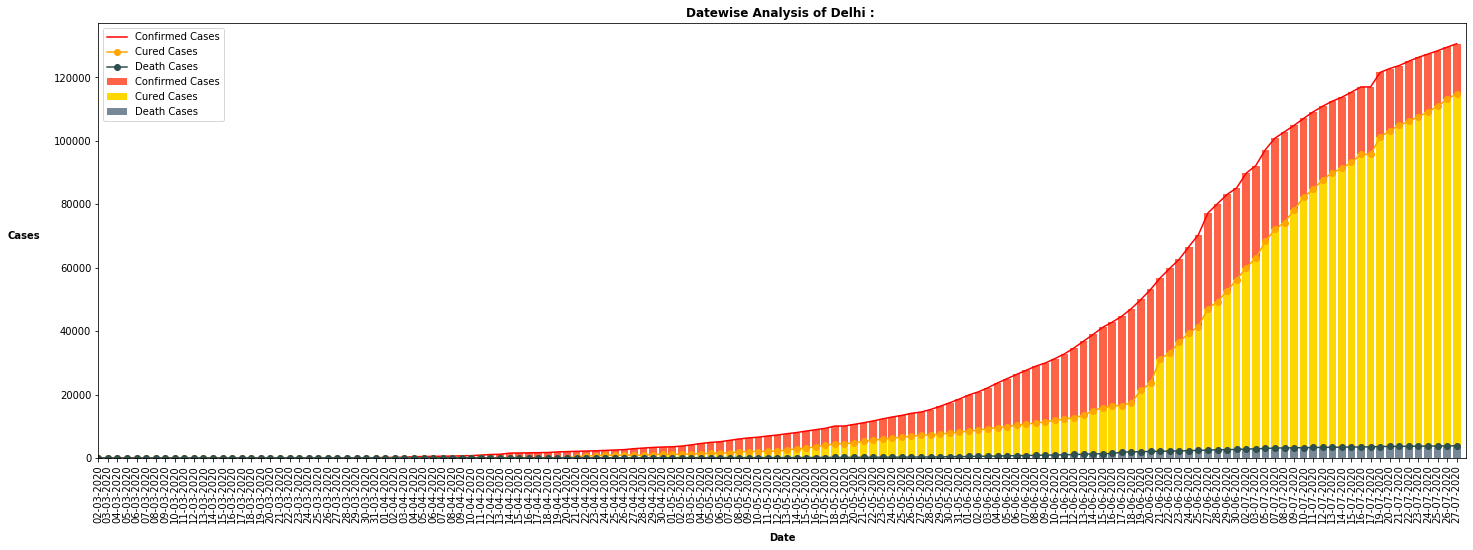

In [4]:
from matplotlib import pyplot as plt
#Plot of Daywise Analysis
plt.figure(figsize=(10, 8))
plt.title('Datewise Analysis of Delhi : ',fontweight='bold')
#set_position([.4, 1.04])
plt.plot(data1.Date,data1.Total_confirmed, color='red', label='Confirmed Cases')
plt.plot(data1.Date,data1.Total_cured, color='orange', label='Cured Cases', marker='o')
plt.plot(data1.Date,data1.Total_deaths, color='darkslategrey', label='Death Cases', marker='o')

plt.bar(data1.Date,data1.Total_confirmed, color='tomato', label='Confirmed Cases')
plt.bar(data1.Date,data1.Total_cured, color='gold', label='Cured Cases')
plt.bar(data1.Date,data1.Total_deaths, color='lightslategrey', label='Death Cases')
 
plt.xlabel('Date',fontweight='bold',labelpad=10)
plt.ylabel('Cases',fontweight='bold',labelpad=30,rotation=0)
plt.xticks(rotation=90 )
plt.xlim([0,143])
plt.subplots_adjust(-1)
plt.legend()
plt.show()


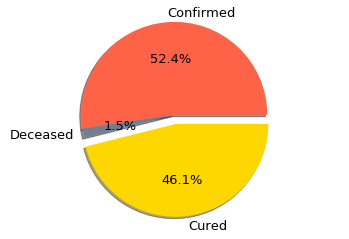

In [5]:
#piechart representation of cases
labels=['Confirmed','Deceased','Cured']
sizes=[130606,3827,114875]
colors = ['tomato', 'slategray', 'gold']
explode = (0, 0, 0.1) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',textprops={'color':"black",'fontsize':13},shadow=True, center=(0.5,0.5), startangle=0)
plt.axis('equal')
plt.show()

### Correlation Heatmap for various parameters

In [6]:
#Correlation between data column names
data1.corr()

,Total_confirmed,Total_deaths,Total_cured,New_cases,New_deaths,New_cured
Total_confirmed,1.000000,0.995413,0.983237,0.655979,0.431014,0.733410
Total_deaths,0.995413,1.000000,0.968435,0.690976,0.471318,0.760040
Total_cured,0.983237,0.968435,1.000000,0.538587,0.318661,0.668234
New_cases,0.655979,0.690976,0.538587,1.000000,0.666081,0.862226
New_deaths,0.431014,0.471318,0.318661,0.666081,1.000000,0.469527
New_cured,0.733410,0.760040,0.668234,0.862226,0.469527,1.000000


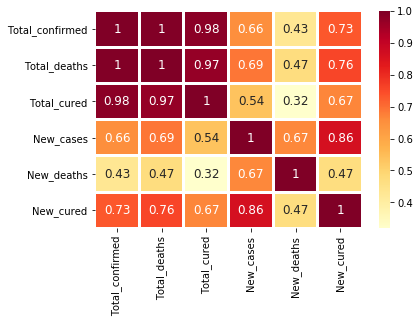

In [7]:
# heatmap of correlation
sns.heatmap(data1.corr(),annot=True,linewidths=2, annot_kws={"size": 12},cmap="YlOrRd")

### Model for predicting the confirmed Cases

In [9]:
data1.columns

Index(['Date', 'State/UT', 'Total_confirmed', 'Total_deaths', 'Total_cured',
       'New_cases', 'New_deaths', 'New_cured'],
      dtype='object')

In [10]:
x=data1[['Date','Total_deaths', 'Total_cured','New_cases', 'New_deaths', 'New_cured']].values
y=data1['Total_confirmed'].values

In [11]:
#Encoding the Date column into code format
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
x[:,0]=LabelEncoder().fit_transform(x[:,0])


In [12]:
x

array([[3, 0, 0, 0, 0, 0],
       [8, 0, 0, 0, 0, 0],
       [13, 0, 0, 0, 0, 0],
       [17, 0, 0, 1, 0, 0],
       [22, 0, 0, 1, 0, 0],
       [26, 0, 0, 0, 0, 0],
       [31, 0, 0, 0, 0, 0],
       [36, 0, 0, 1, 0, 0],
       [41, 0, 0, 0, 0, 0],
       [46, 0, 0, 1, 0, 0],
       [51, 0, 0, 1, 0, 0],
       [56, 0, 0, 0, 0, 0],
       [61, 1, 1, 1, 1, 1],
       [66, 1, 2, 0, 0, 1],
       [71, 1, 2, 0, 0, 0],
       [76, 1, 2, 1, 0, 0],
       [81, 1, 2, 2, 0, 0],
       [85, 1, 3, 2, 0, 1],
       [90, 1, 3, 5, 0, 0],
       [95, 1, 5, 9, 0, 2],
       [100, 1, 5, 3, 0, 0],
       [105, 1, 5, 0, 0, 0],
       [110, 2, 6, 1, 1, 1],
       [115, 1, 6, 1, -1, 0],
       [120, 1, 6, 5, 0, 0],
       [124, 1, 6, 0, 0, 0],
       [129, 1, 6, 3, 0, 0],
       [133, 2, 6, 0, 1, 0],
       [137, 2, 6, 14, 0, 0],
       [141, 2, 6, 44, 0, 0],
       [0, 2, 6, 55, 0, 0],
       [4, 2, 6, 0, 0, 0],
       [9, 4, 8, 67, 2, 2],
       [14, 6, 8, 167, 2, 0],
       [18, 6, 15, 59, 0, 7],
      

In [13]:
y

array([     1,      1,      1,      2,      3,      3,      3,      4,
            4,      5,      6,      6,      7,      7,      7,      8,
           10,     12,     17,     26,     29,     29,     30,     31,
           36,     36,     39,     39,     53,     97,    152,    152,
          219,    386,    445,    503,    523,    576,    669,    720,
          903,   1069,   1154,   1510,   1561,   1578,   1640,   1707,
         1893,   2003,   2081,   2156,   2248,   2376,   2514,   2625,
         2918,   3108,   3314,   3439,   3515,   3738,   4122,   4549,
         4898,   5104,   5532,   5980,   6318,   6542,   6923,   7233,
         7639,   7998,   8470,   8895,   9333,  10054,  10054,  10554,
        11088,  11659,  12319,  12910,  13418,  14053,  14465,  15257,
        16281,  17386,  18549,  19844,  20834,  22132,  23645,  25004,
        26334,  27654,  28936,  29943,  31309,  32810,  34687,  36824,
        38958,  41182,  42829,  44688,  47102,  49979,  53116,  56746,
      

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print('train set:',x_train.shape, y_train.shape)
print('test set:',x_test.shape, y_test.shape)

train set: (114, 6) (114,)
test set: (29, 6) (29,)


In [15]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(x_train, y_train)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [16]:
#Getting the coefficients
print('Coefficients:', model.coef_)

Coefficients: [-6.67441214 18.38861749  0.5253607   2.42768193 -1.34057413 -1.27452862]


In [17]:
y_predict=model.predict(x_test)
print(y_predict)

[  1869.99814311   4819.57809008   2668.81080001   1884.64364644
   2084.87601058  23149.37242086  55745.24372844  79934.52867401
   1664.65707415   2171.64336837   1452.32440273  13279.84935527
   2390.79495652   1464.06601873   5252.48893468 124901.29650996
   9983.43391825  91586.00076495   2378.71745381   1742.07804573
   1619.26797913  29507.43209769   1426.23538783  11303.66145069
  18425.21858485   2651.78412714 113778.18637269   1491.16046092
   4952.22748214]


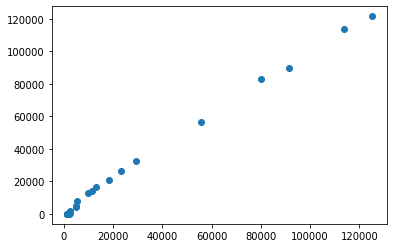

In [18]:
plt.scatter(y_predict, y_test)


In [19]:
#Calculating the rsquared score
from sklearn.metrics import r2_score
print(r2_score(y_predict, y_test))

0.9964694145786693


### Present Statewise Analytics- India

In [20]:
data=pd.read_csv('Latest States_India Covid 19 Report.csv')
data.head()

,State_UTs,Confirmed,Active,Recovered,Deceased,Total Population
0,Andaman and Nicobar,1351,831,500,20,380581
1,Andhra Pradesh,217040,85486,129615,1939,49577103
2,Arunachal Pradesh,2117,684,1430,3,1383727
3,Assam,57714,16983,40591,140,31205576
4,Bihar,75294,26669,48243,382,104099452


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State_UTs         36 non-null     object
 1   Confirmed         36 non-null     int64 
 2   Active            36 non-null     int64 
 3   Recovered         36 non-null     int64 
 4   Deceased          36 non-null     int64 
 5   Total Population  36 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


In [22]:
data.columns
X=data[['Active', 'Recovered', 'Deceased']].values

In [23]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X.astype(int))
X[0:5]

array([[-0.55148786, -0.58509512, -0.39707087],
       [ 2.25515269,  1.27397508,  0.24596446],
       [-0.55636148, -0.57170446, -0.40276738],
       [-0.01598661, -0.00784242, -0.35686022],
       [ 0.30514174,  0.10233537, -0.27576874]])

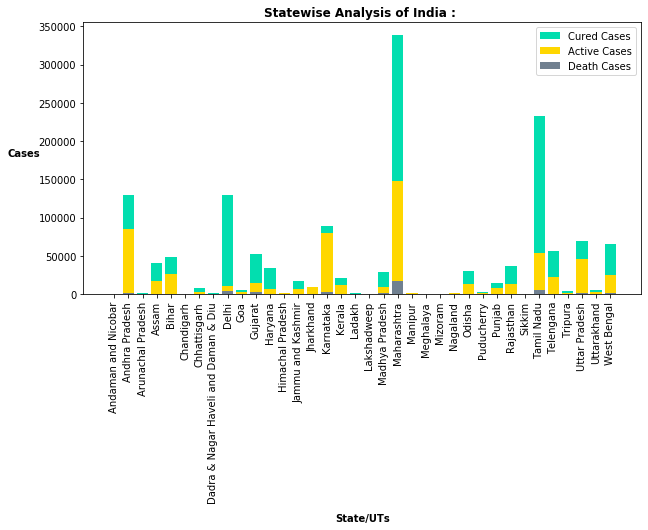

In [51]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))
plt.title('Statewise Analysis of India : ',fontweight='bold')

plt.bar(data.State_UTs,data.Recovered, color='#02deaf', label='Cured Cases')
plt.bar(data.State_UTs,data.Active, color='gold', label='Active Cases')
plt.bar(data.State_UTs,data.Deceased, color='slategrey', label='Death Cases')

plt.xlabel('State/UTs',fontweight='bold',labelpad=10)
plt.ylabel('Cases',fontweight='bold',labelpad=15,rotation=0)
plt.xticks(data.State_UTs,rotation=90 )
#plt.xlim([0,143])
#plt.subplots_adjust(-1)
plt.legend()
plt.show()


### Classifier Model 

In [25]:
data2=pd.read_csv('severity gauging classifier data.csv')
data2.head(30)

,Date,Time,State/UT,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious_symptoms,Less_common_symptoms,Most_common_symptoms,Severity,Patient_Status
0,30-01-2020,6:00 PM,Kerala,1,Male,0,66,chest pain or pressure,headache,fever,Moderate,Covid
1,31-01-2020,6:00 PM,Kerala,1,Male,0,9,loss of speech or movement,loss of taste or smell,tiredness,Mild,Flu
2,02-01-2020,6:00 PM,Kerala,2,Male,0,60,chest pain or pressure,loss of taste or smell,dry cough,Mild,Covid
3,02-02-2020,6:00 PM,Kerala,3,Male,0,74,chest pain or pressure,conjunctivitis,dry cough,Moderate,Covid
4,02-03-2020,6:00 PM,Kerala,3,Male,0,72,chest pain or pressure,sore throat,fever,Moderate,Covid
5,02-04-2020,6:00 PM,Kerala,3,Male,0,38,loss of speech or movement,sore throat,fever,Seviour,Flu
6,02-05-2020,6:00 PM,Kerala,3,Male,0,31,loss of speech or movement,headache,fever,Mild,Covid
7,02-06-2020,6:00 PM,Kerala,3,Male,0,85,chest pain or pressure,headache,fever,Mild,Flu
8,02-07-2020,6:00 PM,Kerala,3,Male,0,97,chest pain or pressure,aches and pains,dry cough,Mild,Covid
9,02-08-2020,6:00 PM,Kerala,3,Male,0,49,chest pain or pressure,"a rash on skin, or discolouration of fingers o...",fever,Mild,Covid


In [26]:
#encoding the data into integer format
data2.Gender[data2.Gender =='Male']=1
data2.Gender[data2.Gender =='Female']=2

data2.Serious_symptoms[data2.Serious_symptoms=='chest pain or pressure']=1
data2.Serious_symptoms[data2.Serious_symptoms=='loss of speech or movement']=2
data2.Serious_symptoms[data2.Serious_symptoms=='difficulty breathing or shortness of breath']=3


data2.Less_common_symptoms[data2.Less_common_symptoms=='headache']=1
data2.Less_common_symptoms[data2.Less_common_symptoms=='loss of taste or smell']=2
data2.Less_common_symptoms[data2.Less_common_symptoms=='sore throat']=3
data2.Less_common_symptoms[data2.Less_common_symptoms=='conjunctivitis']=4
data2.Less_common_symptoms[data2.Less_common_symptoms=='diarrhoea']=5
data2.Less_common_symptoms[data2.Less_common_symptoms=='aches and pains']=6
data2.Less_common_symptoms[data2.Less_common_symptoms=='a rash on skin, or discolouration of fingers or toes']=7

data2.Most_common_symptoms[data2.Most_common_symptoms=='fever']=1
data2.Most_common_symptoms[data2.Most_common_symptoms=='tiredness']=2
data2.Most_common_symptoms[data2.Most_common_symptoms=='dry cough']=3

data2.Severity[data2.Severity=='Mild']=1
data2.Severity[data2.Severity=='Moderate']=2
data2.Severity[data2.Severity=='Seviour']=3

data2.Patient_Status[data2.Patient_Status=='Flu']=1
data2.Patient_Status[data2.Patient_Status=='Covid']=2

data2['Gender'] = data2['Gender'].astype('int')
data2['Serious_symptoms'] = data2['Serious_symptoms'].astype('int')
data2['Less_common_symptoms'] = data2['Less_common_symptoms'].astype('int')
data2['Most_common_symptoms'] = data2['Most_common_symptoms'].astype('int')
data2['Severity'] = data2['Severity'].astype('int')
data2['Patient_Status'] = data2['Patient_Status'].astype('int')

#dataset after encoding
data2.head(20)
data2.info()

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\anaconda\lib\site-packages\ipykernel_launcher.py

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      3135 non-null   object
 1   Time                      3135 non-null   object
 2   State/UT                  3135 non-null   object
 3   ConfirmedIndianNational   3135 non-null   int64 
 4   Gender                    3135 non-null   int32 
 5   ConfirmedForeignNational  3135 non-null   int64 
 6   Age                       3135 non-null   int64 
 7   Serious_symptoms          3135 non-null   int32 
 8   Less_common_symptoms      3135 non-null   int32 
 9   Most_common_symptoms      3135 non-null   int32 
 10  Severity                  3135 non-null   int32 
 11  Patient_Status            3135 non-null   int32 
dtypes: int32(6), int64(3), object(3)
memory usage: 220.6+ KB


C:\anaconda\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\anaconda\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\anaconda\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\anaconda\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [27]:
data2.notnull()

,Date,Time,State/UT,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious_symptoms,Less_common_symptoms,Most_common_symptoms,Severity,Patient_Status
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
3130,True,True,True,True,True,True,True,True,True,True,True,True
3131,True,True,True,True,True,True,True,True,True,True,True,True
3132,True,True,True,True,True,True,True,True,True,True,True,True
3133,True,True,True,True,True,True,True,True,True,True,True,True


In [28]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      3135 non-null   object
 1   Time                      3135 non-null   object
 2   State/UT                  3135 non-null   object
 3   ConfirmedIndianNational   3135 non-null   int64 
 4   Gender                    3135 non-null   int32 
 5   ConfirmedForeignNational  3135 non-null   int64 
 6   Age                       3135 non-null   int64 
 7   Serious_symptoms          3135 non-null   int32 
 8   Less_common_symptoms      3135 non-null   int32 
 9   Most_common_symptoms      3135 non-null   int32 
 10  Severity                  3135 non-null   int32 
 11  Patient_Status            3135 non-null   int32 
dtypes: int32(6), int64(3), object(3)
memory usage: 220.6+ KB


In [29]:
x=data2[['Gender','ConfirmedForeignNational', 'Age ', 'Serious_symptoms','Less_common_symptoms', 'Most_common_symptoms', 'Severity']].values
y=data2['Patient_Status'].values
print('x:', x)
print('\ny:',y)

x: [[ 1  0 66 ...  1  1  2]
 [ 1  0  9 ...  2  2  1]
 [ 1  0 60 ...  2  3  1]
 ...
 [ 1  0 80 ...  4  3  1]
 [ 1  0 39 ...  1  1  2]
 [ 2  0 78 ...  2  1  1]]

y: [2 1 2 ... 2 1 2]


In [30]:
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x.astype(int))
x[0:5]

array([[-1.00031903, -0.14722546,  0.50650619, -1.21513239, -1.51212429,
        -1.20390216, -0.02295141],
       [-1.00031903, -0.14722546, -1.54904714,  0.00584198, -1.00861822,
         0.01871957, -1.24248801],
       [-1.00031903, -0.14722546,  0.29013216, -1.21513239, -1.00861822,
         1.2413413 , -1.24248801],
       [-1.00031903, -0.14722546,  0.79500491, -1.21513239, -0.00160608,
         1.2413413 , -0.02295141],
       [-1.00031903, -0.14722546,  0.72288023, -1.21513239, -0.50511215,
        -1.20390216, -0.02295141]])

In [31]:
#splitting the data into train & test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print('train set:',x_train.shape, y_train.shape)
print('test set:',x_test.shape, y_test.shape)

train set: (2508, 7) (2508,)
test set: (627, 7) (627,)


In [32]:
#Evaluating the right value of K 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 20
mean_acc = np.zeros((Ks-1))  #Numpy zeros np.zeros() function in python is used to get an array 
                            #of given shape and type filled with zeros first = np.zeros(2, dtype = int)
                            #ans:-[0,0]....second = np.zeros([2, 2], dtype = int) ans:-[[0,0][0,0]]
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    model = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    y_test_Predict=model.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_test_Predict)

print('Mean Accuracy:',mean_acc)

Mean Accuracy: [0.49441786 0.50877193 0.49441786 0.50877193 0.46889952 0.49282297
 0.48325359 0.49441786 0.47208931 0.50239234 0.49601276 0.48484848
 0.47049442 0.48165869 0.47049442 0.48325359 0.47208931 0.48803828
 0.47208931]


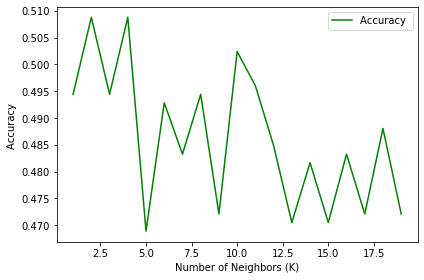

In [33]:
#plot of chosing the value of K
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [34]:
from sklearn.neighbors import KNeighborsClassifier
k = 2
#Train Model and Predict  
model = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [35]:
y_test_Predict = model.predict(x_test)   
y_test_Predict[0:5]

array([2, 1, 2, 1, 1])

In [36]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(x_train)))   
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_test_Predict))

Train set Accuracy:  0.7324561403508771
Test set Accuracy:  0.5087719298245614


In [37]:
print(metrics.accuracy_score(y_test, y_test_Predict))

0.5087719298245614


In [38]:
print(metrics.f1_score(y_test, y_test_Predict))

0.6150000000000001


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
#evaluaitng the model using the confusion matrix
cm=confusion_matrix(y_test, y_test_Predict)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[246  84]
 [224  73]]


Confusion matrix
[[246  84]
 [224  73]]


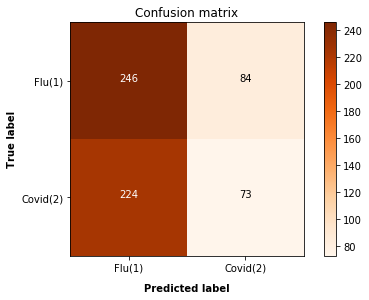

In [40]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = 160 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label',fontweight='bold')
    plt.xlabel('Predicted label',fontweight='bold', labelpad=10)
    
cm=confusion_matrix(y_test, y_test_Predict)

plt.figure()
plot_confusion_matrix(cm, classes=['Flu(1)','Covid(2)'],title='Confusion matrix')


### Severity Classifier

In [41]:
x=data2[['Gender', 'Age ', 'Serious_symptoms','Less_common_symptoms', 'Most_common_symptoms']].values
y=data2['Severity'].values
print('x:', x)
print('\ny:',y)

x: [[ 1 66  1  1  1]
 [ 1  9  2  2  2]
 [ 1 60  1  2  3]
 ...
 [ 1 80  3  4  3]
 [ 1 39  2  1  1]
 [ 2 78  3  2  1]]

y: [2 1 1 ... 1 2 1]


In [42]:
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x.astype(int))
x[0:5]

array([[-1.00031903,  0.50650619, -1.21513239, -1.51212429, -1.20390216],
       [-1.00031903, -1.54904714,  0.00584198, -1.00861822,  0.01871957],
       [-1.00031903,  0.29013216, -1.21513239, -1.00861822,  1.2413413 ],
       [-1.00031903,  0.79500491, -1.21513239, -0.00160608,  1.2413413 ],
       [-1.00031903,  0.72288023, -1.21513239, -0.50511215, -1.20390216]])

In [43]:
#splitting the data into train & test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print('train set:',x_train.shape, y_train.shape)
print('test set:',x_test.shape, y_test.shape)

train set: (2508, 5) (2508,)
test set: (627, 5) (627,)


In [44]:
from sklearn import svm
model = svm.SVC(kernel='rbf')
model.fit(x_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
y_test_Predict = model.predict(x_test)   
print('y_test_Predict:',y_test_Predict[0:10])
print('y_test:',y_test[0:10])

y_test_Predict: [2 2 3 2 1 2 3 3 3 1]
y_test: [1 1 2 1 3 1 1 3 3 3]


In [46]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(x_train)))   
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_test_Predict))

Train set Accuracy:  0.4166666666666667
Test set Accuracy:  0.3524720893141946


Confusion matrix
[[61 66 81]
 [54 74 84]
 [63 58 86]]


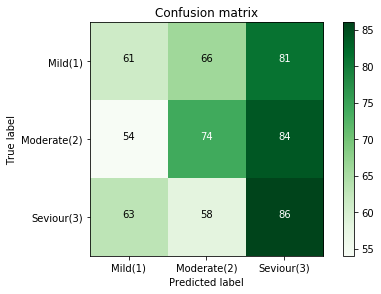

In [47]:
from sklearn import preprocessing
import matplotlib.cm as cm
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = (cm.max() / 2)+30
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')  
    
cnf_matrix = confusion_matrix(y_test,y_test_Predict, labels=[1,2,3])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Mild(1)','Moderate(2)','Seviour(3)'],title='Confusion matrix')

In [48]:
print(metrics.accuracy_score(y_test, y_test_Predict))

0.3524720893141946


In [49]:
y_test_Predict[0:70]==y_test[0:70]

array([False, False, False, False, False, False, False,  True,  True,
       False, False,  True,  True, False, False, False,  True, False,
        True, False, False, False,  True,  True, False, False,  True,
        True, False,  True, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
        True, False, False,  True,  True,  True,  True, False, False,
       False, False,  True, False, False, False, False])

In [50]:
print(metrics.f1_score(y_test, y_test_Predict, average='weighted'))

0.3508863687035969
